### Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [7]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

* Нормальное
* Равномерное
* Биноминальное
* Бернулли
* Геометрическое
* Логнормальное

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

Написать __линейную регрессию__ на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT.

* Разделить данные на 80% тренировочных, 20% тестовых
* Составить модель линейной регрессии
* Посчитать ошибку модели на тестовых данных
* Сделать точечный график данных и полученной прямой линейной регрессии

__Решение__

Графики вроде построились, а вот про распределения, кажется, в некоторых случаях получается просто пальцем в небо

* Нормальное распределение — RM, MEDV, 
* Равномерное — вроде нет 
* Биноминальное — возможно, RAD и TAX
* Бернулли — CHAS
* Геометрическое — допустим, INDUS, NOX и PTRATIO
* Логнормальное — DIS, LSTAT (это вообще хи-квадратное?), вообще B, AGE, ZN и CRIM тоже сюда хочется записать...

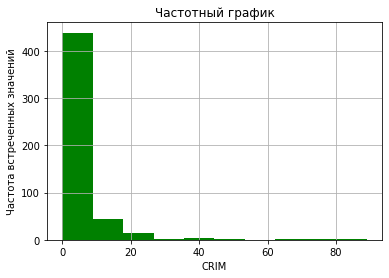

In [9]:
n, bins, patches = plt.hist(data['CRIM'], 10, facecolor='g')

plt.xlabel('CRIM')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

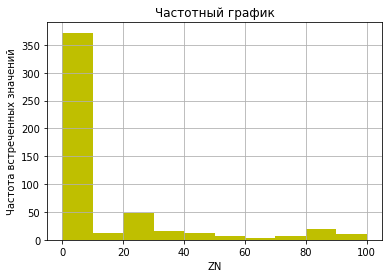

In [10]:
n, bins, patches = plt.hist(data['ZN'], 10, facecolor='y')

plt.xlabel('ZN')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

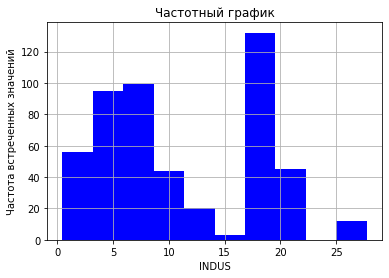

In [11]:
n, bins, patches = plt.hist(data['INDUS'], 10, facecolor='b')

plt.xlabel('INDUS')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

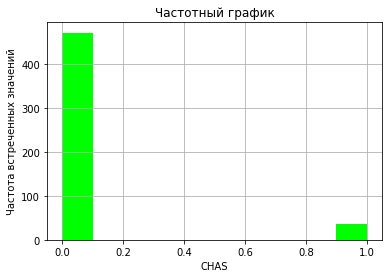

In [19]:
n, bins, patches = plt.hist(data['CHAS'], 10, facecolor='lime')

plt.xlabel('CHAS')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

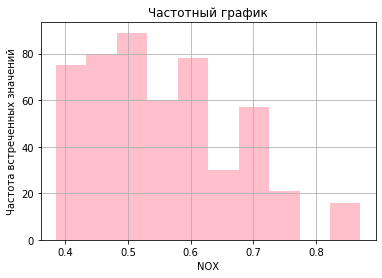

In [20]:
n, bins, patches = plt.hist(data['NOX'], 10, facecolor='pink')

plt.xlabel('NOX')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

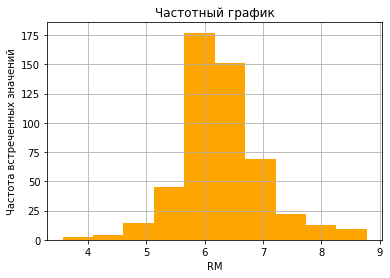

In [21]:
n, bins, patches = plt.hist(data['RM'], 10, facecolor='orange')

plt.xlabel('RM')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

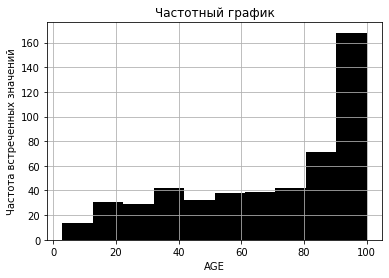

In [22]:
n, bins, patches = plt.hist(data['AGE'], 10, facecolor='black')

plt.xlabel('AGE')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

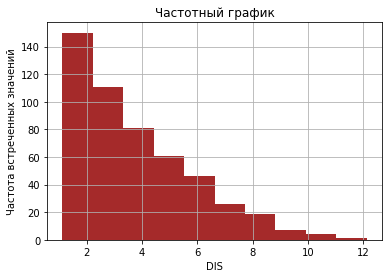

In [23]:
n, bins, patches = plt.hist(data['DIS'], 10, facecolor='brown')

plt.xlabel('DIS')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

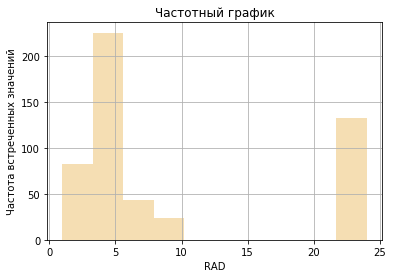

In [28]:
n, bins, patches = plt.hist(data['RAD'], 10, facecolor='wheat')

plt.xlabel('RAD')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

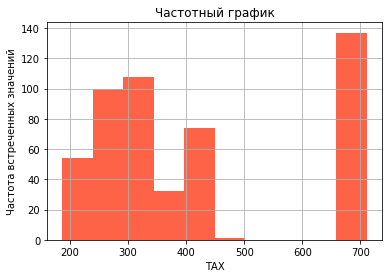

In [29]:
n, bins, patches = plt.hist(data['TAX'], 10, facecolor='tomato')

plt.xlabel('TAX')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

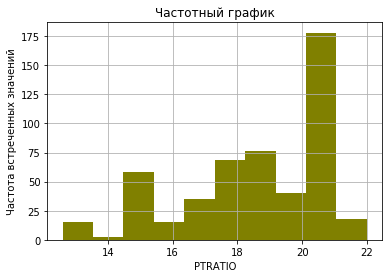

In [30]:
n, bins, patches = plt.hist(data['PTRATIO'], 10, facecolor='olive')

plt.xlabel('PTRATIO')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

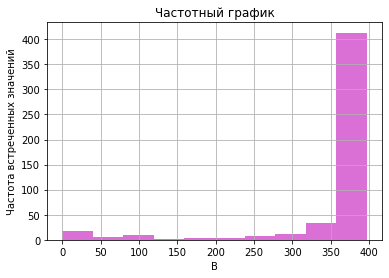

In [31]:
n, bins, patches = plt.hist(data['B'], 10, facecolor='orchid')

plt.xlabel('B')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

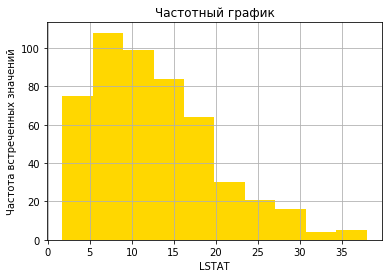

In [33]:
n, bins, patches = plt.hist(data['LSTAT'], 10, facecolor='gold')

plt.xlabel('LSTAT')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

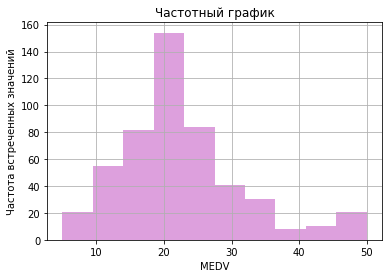

In [34]:
n, bins, patches = plt.hist(data['MEDV'], 10, facecolor='plum')

plt.xlabel('MEDV')
plt.ylabel('Частота встреченных значений')
plt.title('Частотный график')
plt.grid(True)
plt.show()

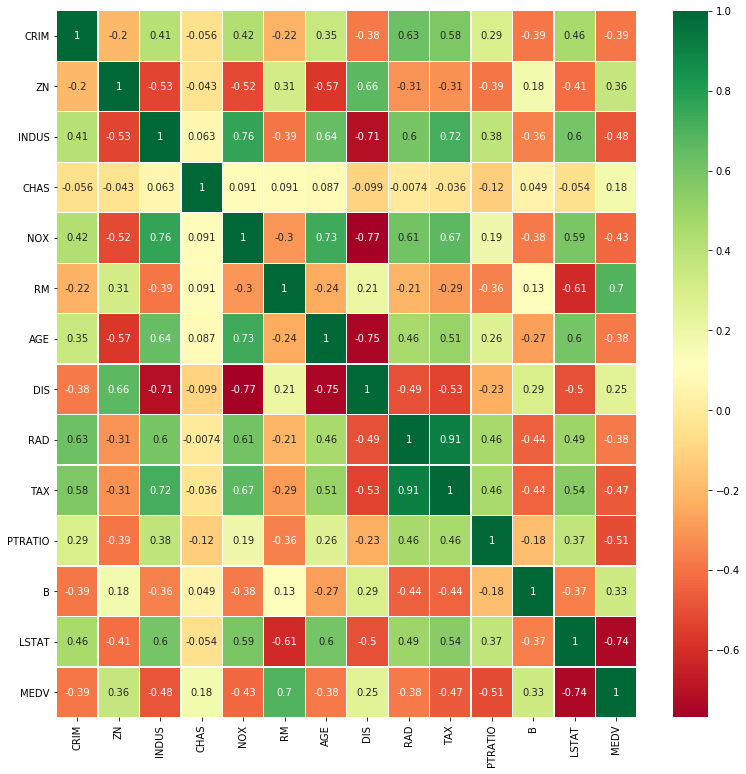

In [38]:
#матрица корелляций — сильнее всего с ценой на дома (MEDV) кореллируют с LSTAT (ммм, процент населения с низким статусом?) (отрицательно)
# и RM (среднее количество комнат); c остальными значительно меньше

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.show()

In [42]:
#Линейная регрессия для MEDV и LSTAT

medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
#Разделить данные на 80% тренировочных, 20% тестовых

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)

In [46]:
#Составить модель линейной регрессии

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#Посчитать ошибку модели на тестовых данных

model.score(X_test, y_test)

0.49786451606394355

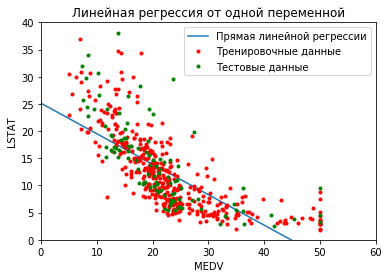

In [67]:
#Сделать точечный график данных и полученной прямой линейной регрессии

plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')

# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)

# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(0,60)
plt.ylim(0,40)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [70]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

Сколько стран в выборке? Написать ответ.

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [78]:
#если я правильно понимаю, то попарно получается вот такие все ковариации 

df.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


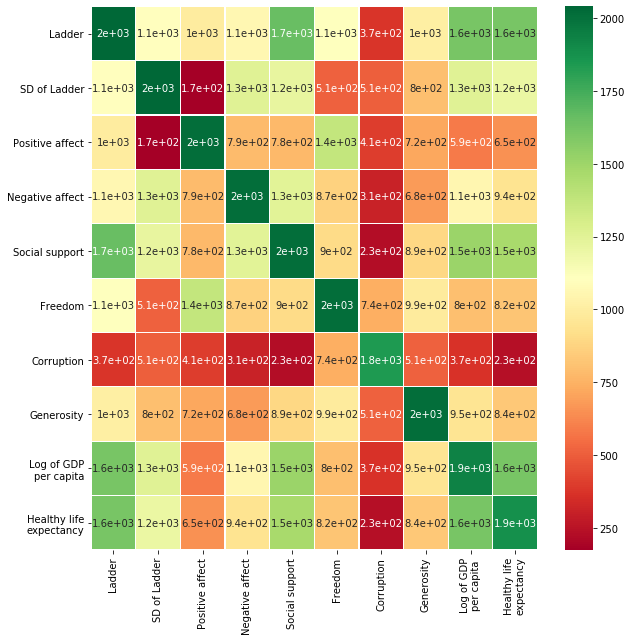

In [81]:
#так вроде тоже работать должно, но выглядит что-то совсем не так, как хотелось бы 

sns.heatmap(df.cov(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [120]:
#Сколько в данной таблице отсутствующих значений? Написать ответ.
#кажется, туповато считать сумму сумм но другое в голову не пришло

print('Всего отсутствует значений:', sum(df.isna().sum()),'\n')

print('Их нет в таких столбцах: \n\n', df.isna().sum())

Всего отсутствует значений: 23 

Их нет в таких столбцах: 

 Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64


In [96]:
#Если есть отсутствующие значения в выборке country, убрать (drop). — тут все есть

df.loc[df['Country (region)'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [130]:
#Сколько стран в выборке? Написать ответ.

print('Cтран в выборке:', len(df['Country (region)']))

Cтран в выборке: 156


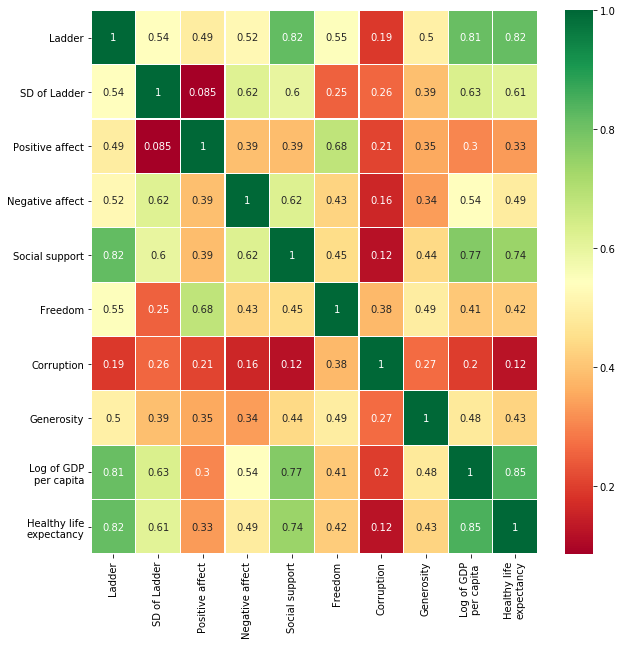

In [132]:
#Матрица корелляций
#ну, например, видим корреляции вроде между социальной поддержкой, ВВП на душу населения и ожидланиями на здоровую жизнь

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

### Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [226]:
die = []

for i in range(0,10):
    
    die.append(random.randrange(1,7))

die

[5, 2, 4, 4, 6, 5, 2, 2, 3, 6]

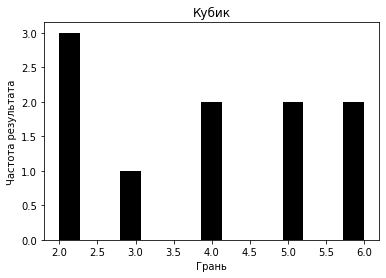

In [227]:
#кажется, что это равномерное распределение

n, bins, patches = plt.hist(die, 15, facecolor='black')

plt.xlabel('Грань')
plt.ylabel('Частота результата')
plt.title('Кубик')
plt.show()

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [221]:
die_sum = []

for i in range(0,1000):
    
    die1 = []

    for i in range(0,100):
    
        die1.append(random.randrange(1,7))
    
    die_sum.append(sum(die1))

In [222]:
len(die_sum)

1000

In [223]:
die_sum[0:10]

[321, 351, 316, 331, 305, 345, 325, 385, 313, 345]

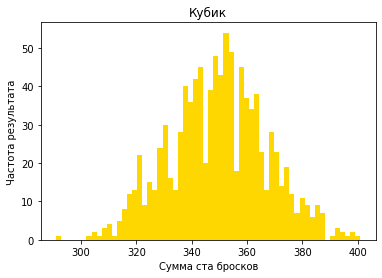

In [224]:
# получается же, кажется, нормальное распределение (ну, или близкое к нему)? 
#изменился, потому что мы берем суммы, видимо, поэтому здесь и можно применять центральную предельную теорему

n, bins, patches = plt.hist(die_sum, 60, facecolor='gold')

plt.xlabel('Сумма ста бросков')
plt.ylabel('Частота результата')
plt.title('Кубик')
plt.show()